In [ ]:
#Import the necessary packages used in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA, TruncatedSVD

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import plotly
import plotly.express as px
init_notebook_mode(connected=True) #do not miss this line

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracision_score
from sklearn.utils import resampley_score,confusion_matrix,f1_score,recall_score,precision_recall_curve,average_prec

# Make notebook full width
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:85% !important; }</style>"))

In [ ]:
datafr = pd.read_csv("/content/transaction_dataset.csv", error_bad_lines=False)

In [ ]:
display(datafr.head(10))


,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
5,5,6,0x000895ad78f4403ecd9468900e68d6ee506136fd,0,9900.12,375.48,20926.68,2,3,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
6,6,7,0x000d63fc5df52b0204374c2f5a3249779805d5d1,0,69.46,629.44,8660.35,25,11,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
7,7,8,0x000e001ab444fa8d6dc4a402f8d7cfc88fe8c64d,0,1497.39,176.84,319828.05,213,5,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,7.0,None,XENON
8,8,9,0x0012cb699c836049a4bbeaac2d8c4d47c688e0e4,0,0.00,0.00,496.62,1,1,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
9,9,10,0x0012f247c9f980eea0a9ad06893bfd95c3145794,0,2570.59,3336.01,30572.70,8,3,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,None,AICRYPTO


In [ ]:
display(datafr.tail(10))


,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
9831,9831,2170,0xfe9b7db8d9d57e9ad9341bcf51b110ba5d27b48b,1,193.09,81.82,1485.80,6,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,9832,2171,0xfea28ca175a80f5a348016583961f63be8605f80,1,0.00,0.00,0.00,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,,Blockwell say NOTSAFU
9833,9833,2172,0xff0e20e3a7575d823302bbb27e233c23f2c3070b,1,0.00,0.00,0.00,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9834,9834,2173,0xff2f6c6fbd71a078f1c1781855467d30897b5a33,1,0.00,49.51,12643.85,1,15,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9835,9835,2174,0xff35866acb80ce4b169d1460cd48108955c1c445,1,0.00,0.00,8427.92,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9836,9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,9839,2178,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9840,9840,2179,0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c,1,37242.70,149.56,670817.33,18,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,,INS Promo1


In [ ]:
datafr.dtypes


Unnamed: 0                                                int64
Index                                                     int64
Address                                                  object
FLAG                                                      int64
Avg min between sent tnx                                float64
Avg min between received tnx                            float64
Time Diff between first and last (Mins)                 float64
Sent tnx                                                  int64
Received Tnx                                              int64
Number of Created Contracts                               int64
Unique Received From Addresses                            int64
Unique Sent To Addresses                                  int64
min value received                                      float64
max value received                                      float64
avg val received                                        float64
min val sent                            

In [ ]:
datafr.var().astype(int)


<ipython-input-10-f8b3586c869d>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Unnamed: 0                                                          8071260
Index                                                               1494804
FLAG                                                                      0
Avg min between sent tnx                                          461671829
Avg min between received tnx                                      532765558
Time Diff between first and last (Mins)                        104288903881
Sent tnx                                                             573391
Received Tnx                                                         885173
Number of Created Contracts                                           20006
Unique Received From Addresses                                        89174
Unique Sent To Addresses                                              69601
min value received                                                   106229
max value received                                                169229437
avg val rece

In [ ]:
datafr.columns


Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [ ]:
datafr.drop(['Unnamed: 0','Index','Address','min value sent to contract', 'max val sent to contract', 'avg value sent to contract', 'total ether sent contracts', ' ERC20 uniq sent addr.1', ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx', ' ERC20 min val sent contract', ' ERC20 max val sent contract', ' ERC20 avg val sent contract'], axis=1, inplace=True)
datafr.shape

(9841, 36)

In [ ]:
# Check for Data Duplication
duplicateRowsDF = datafr[datafr.duplicated()]
print("Duplicated Entries")
display(duplicateRowsDF)

# Remove Duplicated entries
datafr = datafr[~datafr.duplicated()]


# Check the missing values in the column
missing_data = datafr.isnull().sum().sort_values(ascending=False)

missing_data = missing_data.reset_index(drop=False)
missing_data = missing_data.rename(columns={"index": "Columns", 0: "Value"})
missing_data['Proportion'] = (missing_data['Value']/len(datafr))*100

sample = missing_data[missing_data['Proportion']>1]
fig = px.pie(sample, names='Columns', values='Proportion',
             color_discrete_sequence=px.colors.sequential.Viridis_r,
             title='Columns with a percentage of Missing values over 1%')
fig.update_traces(textposition='inside', textinfo='label')
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  font=dict(family='Cambria, monospace', size=12, color='#000000'))
fig.show()

Duplicated Entries


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
2933,0,5980.35,18633.46,498256.47,21,20,0,2,18,1.990000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0
2934,0,7042.64,2694.86,80594.87,8,9,0,8,7,0.001000,...,0.299173,140.102687,70.200930,140.102687,140.102687,140.102687,1.0,2.0,Golem,OmiseGO
2936,0,0.00,0.00,0.00,0,1,0,1,0,0.250303,...,0.000000,64.921895,14.443795,0.000000,0.000000,0.000000,0.0,5.0,None,Livepeer Token
2937,0,0.00,0.00,0.00,0,1,0,1,0,0.804725,...,0.000000,171.588208,38.011146,0.000000,0.000000,0.000000,0.0,5.0,None,Livepeer Token
2939,0,9695.78,1133.48,257022.97,14,107,0,6,1,1.027784,...,600.000000,600.000000,600.000000,0.000000,0.000000,0.000000,0.0,1.0,None,AICRYPTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9814,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,1.337000,1.337000,1.337000,0.000000,0.000000,0.000000,0.0,1.0,,Blockwell say NOTSAFU
9818,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,13.370000,13.370000,13.370000,0.000000,0.000000,0.000000,0.0,1.0,,Blockwell say NOTSAFU
9823,1,0.00,0.00,0.00,0,0,1,0,0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Fill Missing Value
datafr = datafr.fillna(method='ffill')

In [ ]:
fig = px.pie(datafr, names='FLAG',
             color_discrete_sequence=px.colors.sequential.Viridis_r,
             title='Proportion of data for FLAG column')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  font=dict(family='Cambria, monospace', size=12, color='#000000'))
fig.show()

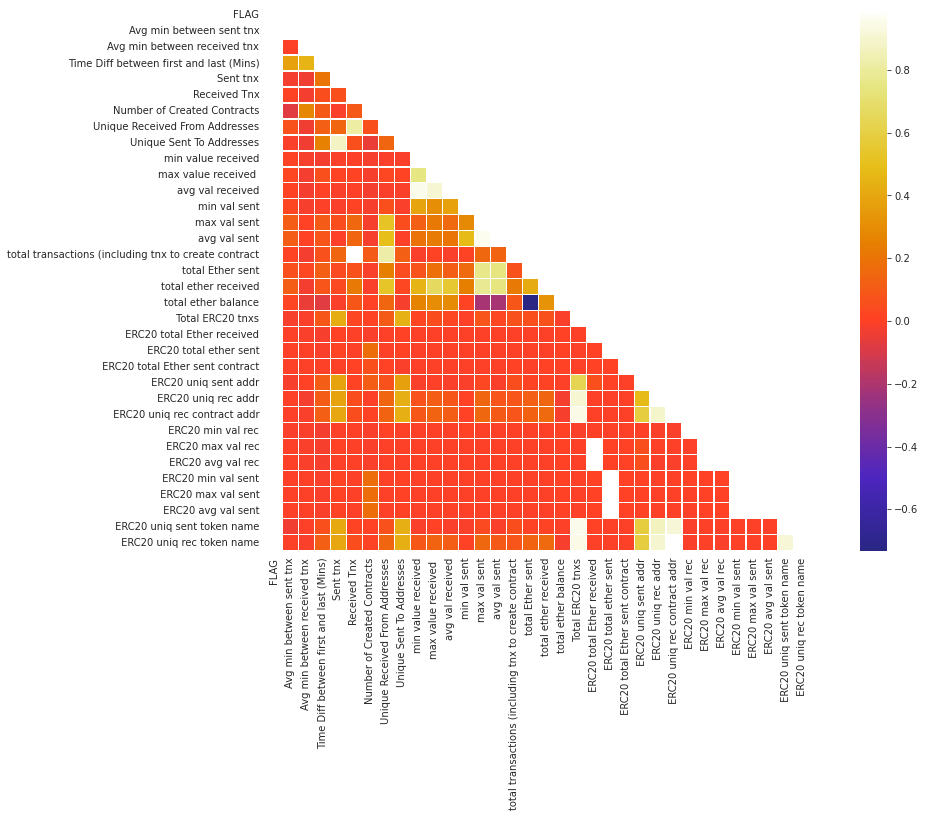

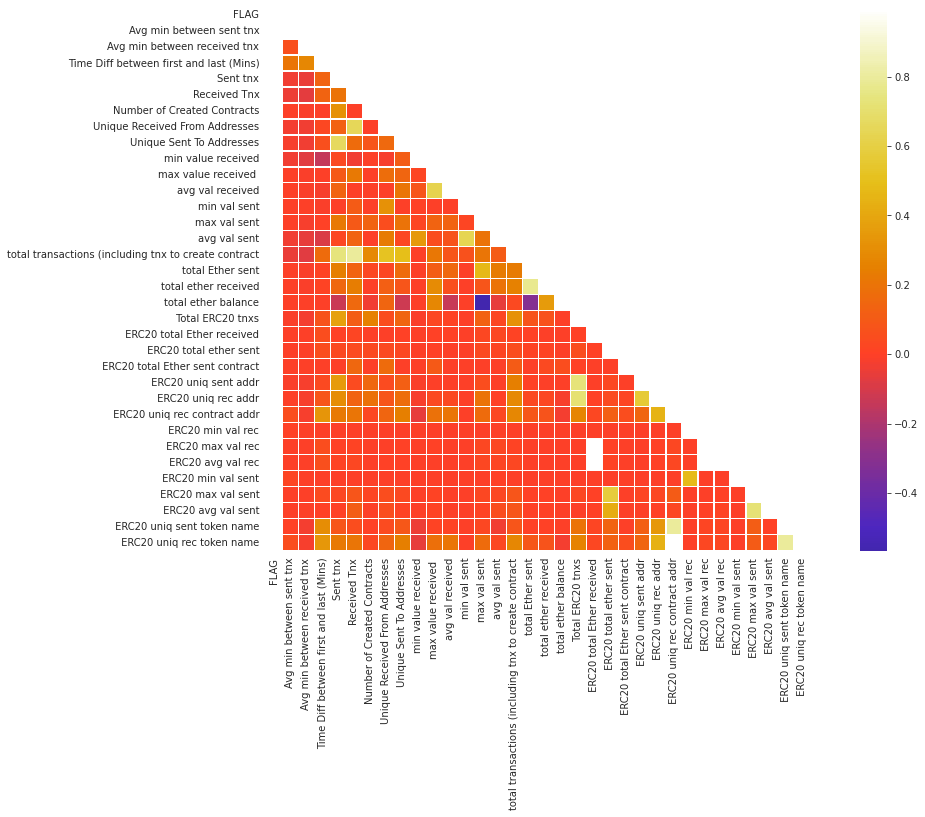

In [ ]:
# Fraudulant Correlation
sample = datafr[datafr['FLAG']==1]
corr = sample.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

# Non-Fraudulant Correlation
sample = datafr[datafr['FLAG']==0]
corr = sample.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = datafr.select_dtypes(include=numerics)

In [ ]:
newdf

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,54.0,58.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,5.0,7.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,7.0,8.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,11.0,11.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,23.0,27.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,1,0.00,0.00,8427.92,0,1,1,1,0,0.000000,...,2.0,2.0,0.0,1.337000e+01,6.685000,0.000000,0.000000e+00,0.000000,0.0,2.0
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,2.0,2.0,0.0,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,2.0
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,5.0,5.0,0.0,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,5.0
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,5.0,5.0,0.0,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,5.0


In [ ]:
!pip install eli5


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 14.2 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=9c32cfe277a99b76917e7c900e664c6f4129d66e9ff82bc2e24923d1827608fb
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
Y = newdf['FLAG']
X = newdf.iloc[:,1:]
train_X, val_X, train_y, val_y = train_test_split(X, Y, random_state=1)
my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)


perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.0096 ± 0.0021,Time Diff between first and last (Mins)
0.0055 ± 0.0017,Unique Received From Addresses
0.0022 ± 0.0011,total transactions (including tnx to create contract
0.0020 ± 0.0010,total ether balance
0.0015 ± 0.0009,Avg min between received tnx
0.0014 ± 0.0011,Received Tnx
0.0014 ± 0.0022,total ether received
0.0010 ± 0.0023,min val sent
0.0009 ± 0.0022,Total ERC20 tnxs
0.0009 ± 0.0027,Sent tnx


In [ ]:
target = newdf['FLAG']


In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
result = calc_vif(newdf)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning:

divide by zero encountered in double_scalars



In [ ]:
# Identify variables with high multi-collinearity
result[result['VIF']>10]

,variables,VIF
4,Sent tnx,9.007199e+15
5,Received Tnx,inf
6,Number of Created Contracts,inf
15,total transactions (including tnx to create co...,9.007199e+15
16,total Ether sent,inf
17,total ether received,inf
18,total ether balance,inf
20,ERC20 total Ether received,2.523693e+04
21,ERC20 total ether sent,1.678618e+03
25,ERC20 uniq rec contract addr,1.762349e+03


In [ ]:
newdf.shape

(9295, 34)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y = newdf['FLAG']
X = newdf.drop(['FLAG'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy is {:.2f}%".format(accuracy * 100.0))
# f1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score is {:.2f}%".format(f1))
# calculate prediction
precision = precision_score(y_test, y_pred, average='binary')
print('Precision is {:.2f}%'.format(precision))
recall = recall_score(y_test, y_pred, average='binary')
print('Recall is {:.2f}%'.format(recall))

Test Accuracy is 97.26%
F1 Score is 0.91%
Precision is 0.92%
Recall is 0.90%


In [ ]:
!pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.5 MB/s eta 0:00:00


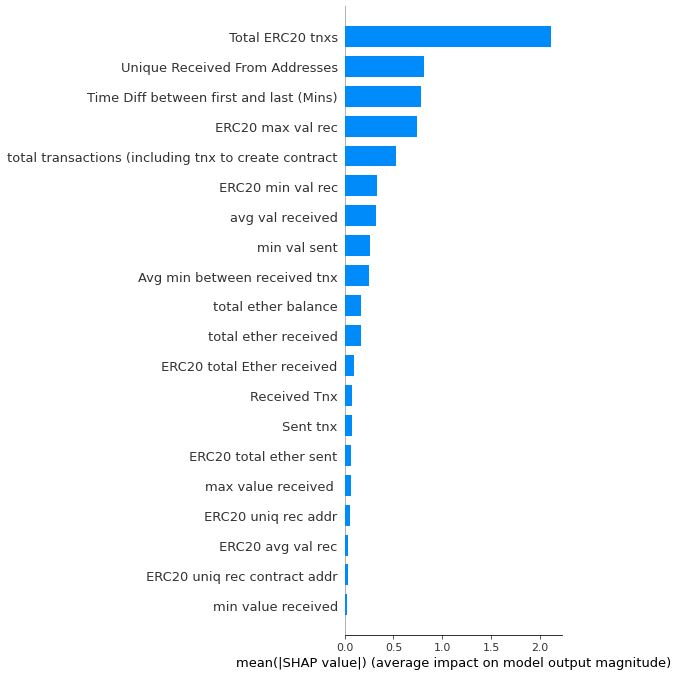

In [ ]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
model = XGBClassifier()
model.fit(X_train[['Unique Received From Addresses', 'Time Diff between first and last (Mins)', 'avg val received']], y_train)

y_pred = model.predict(X_test[['Unique Received From Addresses', 'Time Diff between first and last (Mins)', 'avg val received']])
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy is {:.2f}%".format(accuracy * 100.0))

Test Accuracy is 90.96%


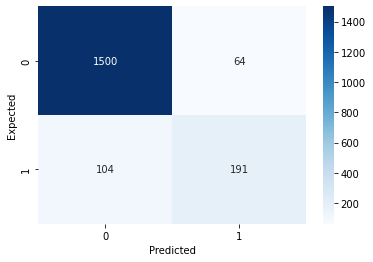

In [ ]:
# assign cnf_matrix with result of confusion_matrix array
cnf_matrix = confusion_matrix(y_test,y_pred)
#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.ensemble import BalancedRandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_recall_curve,average_precision_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
random_seed = 303


In [ ]:
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
estimates = list()
estimates.append(('rf', RandomForestClassifier(n_estimators=1200,
                                          max_depth = 8,
                                          min_samples_leaf=10,
                                          random_state=random_seed, 
                                          max_features = 0.4,
                                          class_weight='balanced',
                                          n_jobs=-1)))
estimates.append(('brf', BalancedRandomForestClassifier(n_estimators=1200, 
                                                   max_depth = 8,
                                                   random_state=random_seed, 
                                                   max_features = 0.4,
                                                   class_weight='balanced',
                                                   n_jobs=-1)))
estimates.append(('xgb', XGBClassifier(max_depth=8,
                                  learning_rate=0.7,
                                  n_estimators=1200,
                                  random_state=random_seed,
                                  max_features = 0.4,
                                  min_samples_leaf=10,
                                  eval_metric=["error", "logloss"],
                                  n_jobs=-1)))
estimates.append(('lgbm', LGBMClassifier(boosting_type='gbdt',
                                    num_leaves=10,
                                    max_depth=5,
                                    learning_rate=0.7,
                                    n_estimators=1200,
                                    random_state=random_seed,
                                    max_features = 0.4,
                                    eval_metric=["error", "logloss"],
                                    class_weight='balanced',
                                    n_jobs=-1)))
# Stacking Classifier
stack = StackingClassifier(estimators = estimates, final_estimator=level1)
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimates, voting ='hard')

In [ ]:
def get_models():
    models = {}
    models['stack'] = stack
    # models['vot_hard'] = vot_hard
    return models

In [ ]:
newdf.shape

(9295, 34)

In [ ]:
Y = newdf['FLAG'].values #Target
X = newdf.drop('FLAG',axis=1) #Features

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
# setting up testing and training sets
# Random Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_seed)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=random_seed) # 0.25 x 0.8 = 0.2

# SMOTEENN
smenn = SMOTEENN(random_state=random_seed)
X_train, Y_train = smenn.fit_resample(X_train, Y_train)

In [ ]:
unique, counts = np.unique(Y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0 3489]
 [   1 3859]]


In [ ]:
unique, counts = np.unique(Y_test, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0 1580]
 [   1  279]]


In [ ]:
models = get_models()

In [ ]:
import pickle
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
print("Train Size", X_train.shape)
print("Valid Size", X_val.shape)
print("Test Size", X_test.shape)

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)

X_valid_scaled = scaler.transform(X_val)
X_valid_scaled = pd.DataFrame(X_valid_scaled)

final_test_scaled = scaler.transform(X_test)
final_test_scaled = pd.DataFrame(final_test_scaled)

prediction_smote = {}
for model in models.keys():
    print("Model {0}".format(model))
    smote = models[model]
    eval_set = [(X_train_scaled, Y_train), (X_valid_scaled, Y_val)]
    smote.fit(X_train_scaled, Y_train)
    # save the model to disk
    filename = 'finalized_model.sav'
    pickle.dump(smote, open(filename, 'wb'))

# load model
loaded_model = pickle.load(open(filename, 'rb'))
    
# predict probabilities
probs = loaded_model.predict_proba(final_test_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# Predict on test
smote_pred = loaded_model.predict(final_test_scaled)
prediction_smote = smote_pred

Train Size (7348, 33)
Valid Size (1859, 33)
Test Size (1859, 33)
Model stack


In [ ]:
prediction_smote

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# Checking Balanced accuracy
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

def evaluate(Y_test, smote_pred):
    b_a = balanced_accuracy_score(Y_test, smote_pred)
    print("Balanced Test Accuracy is {:.2f}%".format(b_a * 100.0))
    f1_over = f1_score(Y_test, smote_pred)
    print("F1 Score is {:.2f}%".format(f1_over))
    # assign cnf_matrix with result of confusion_matrix array
    cnf_matrix = confusion_matrix(Y_test,smote_pred)
    #create a heat map
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()
    precision_positive = metrics.precision_score(Y_test, smote_pred, pos_label=1)
    precision_negative = metrics.precision_score(Y_test, smote_pred, pos_label=0)
    
    recall_sensitivity = metrics.recall_score(Y_test, smote_pred, pos_label=1)
    recall_specificity = metrics.recall_score(Y_test, smote_pred, pos_label=0)
    
    #recall = np.diag(cnf_matrix) / np.sum(cnf_matrix, axis = 1)
    #precision = np.diag(cnf_matrix) / np.sum(cnf_matrix, axis = 0)
    print("Precision Positive-1:", np.mean(precision_positive))
    print("Precision Negative-0:", np.mean(precision_negative))
    print("Recall Sensitivity-1:", np.mean(recall_sensitivity))
    print("Recall Specificity-0:", np.mean(recall_specificity))
    return b_a, f1_over, precision_positive, precision_negative, recall_sensitivity, recall_specificity 

Balanced Test Accuracy is 96.96%
F1 Score is 0.91%


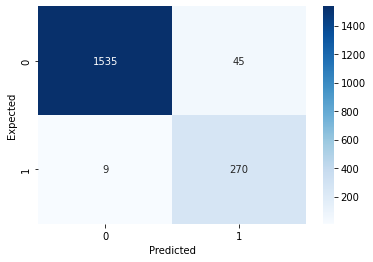

Precision Positive-1: 0.8571428571428571
Precision Negative-0: 0.9941709844559585
Recall Sensitivity-1: 0.967741935483871
Recall Specificity-0: 0.9715189873417721


In [ ]:
b_accuracy = []
f1_scores = []
precisions_pos = []
precisions_neg = []
recall_sens = []
recall_spec = []
a,b,c,d,e,f = evaluate(np.array(Y_test.astype(int)), prediction_smote)
b_accuracy.append(a)
f1_scores.append(b)
precisions_pos.append(c)
precisions_neg.append(d)
recall_sens.append(e)
recall_spec.append(f)